In [ ]:
pip install category_encoders

In [ ]:
pip install pdp

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot


In [ ]:
pip install shap

In [ ]:
import pandas as pd
import seaborn as sns
from pdpbox.pdp import pdp_isolate, pdp_plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
#from sklearn.linear_model import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from category_encoders import OneHotEncoder 
from category_encoders import OrdinalEncoder 
import random 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


from google.colab import drive
drive.mount('/content/drive')

dfog = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stockx.csv")

In [ ]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(dfog, train_size=0.80, test_size=0.20, 
#                               random_state=2)

In [ ]:
# y_train = train[target]
# major = y_train.mode()[0]
# y_pred = [major] * len(y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# print("베이스라인 정확도는: ", accuracy_score(y_train, y_pred))

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StockX2.csv") #추후에 사용하는 데이터셋 

In [ ]:
df = dfog

In [ ]:
df1 = df

# EDA 

In [ ]:
# 신발 색깔별로 정리 
# 검은색 신발 (completed)

df.loc[(df['Sneaker Name'] == 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Green'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Red'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-White'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Zebra'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Presto-Off-White'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-VaporMax-Off-White'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-VaporMax-Off-White-Black'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Presto-Off-White-Black-2018'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Zoom-Fly-Mercurial-Off-White-Black'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'adidas-Yeezy-Boost-350-V2-Butter'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Blazer-Mid-Off-White-Grim-Reaper'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White-Black'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Zoom-Fly-Off-White-Black-Silver'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Force-1-Low-Off-White-Volt'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Force-1-Low-Off-White-Black-White'),'Black'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-90-Off-White-Black'),'Black'] = 1

#Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017

#df.loc[~(df['htm'] == 'LAL'),'Black'] = 0

In [ ]:
# White shoes 

df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Cream-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Zebra'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Presto-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-VaporMax-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-90-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Air-Jordan-1-Retro-High-Off-White-Chicago'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Blazer-Mid-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Turtledove'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Force-1-Low-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-React-Hyperdunk-2017-Flyknit-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Zoom-Fly-Off-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Blue-Tint'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-VaporMax-Off-White-2018'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Air-Jordan-1-Retro-High-Off-White-White'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Air-Jordan-1-Retro-High-Off-White-University-Blue'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Presto-Off-White-White-2018'),'White'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen'),'White'] = 1


In [ ]:
# Grey 
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-V2-Beluga'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Moonrock'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Turtledove'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Blue-Tint'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Sesame'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Blazer-Mid-Off-White-Wolf-Grey'),'Grey'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White-Menta'),'Grey'] = 1

In [ ]:
# Red
df.loc[(df['Sneaker Name'] ==  'Air-Jordan-1-Retro-High-Off-White-Chicago'),'Red'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Red'),'Red'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017'),'Red'] = 1

In [ ]:
# Green
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Green'),'Red'] = 1

In [ ]:
# Neon
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'),'Neon'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Force-1-Low-Off-White-Black-White'),'Neon'] = 1

In [ ]:
# Orange 
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-V2-Beluga'),'Orange'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper'),'Orange'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange'),'Orange'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen'),'Orange'] = 1

In [ ]:
# Tan / Brown 3개 
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-90-Off-White'),'Tan/Brown'] = 1
df.loc[(df['Sneaker Name'] ==  'Adidas-Yeezy-Boost-350-Low-Oxford-Tan'),'Tan/Brown'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-90-Off-White-Desert-Ore'),'Tan/Brown'] = 1

In [ ]:
# Pink 3개 
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen'),'Pink'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Blazer-Mid-Off-White-Wolf-Grey'),'Pink'] = 1
df.loc[(df['Sneaker Name'] ==  'Nike-Zoom-Fly-Off-White-Pink'),'Pink'] = 1

In [ ]:
# Blue 2개 
df.loc[(df['Sneaker Name'] ==  'Nike-Air-Max-90-Off-White'),'Blue'] = 1
df.loc[(df['Sneaker Name'] ==  'Air-Jordan-1-Retro-High-Off-White-University-Blue'),'Blue'] = 1

In [ ]:
df1 = df 

In [ ]:
# Check for Duplicates #
# 사전 과제들 참고 

In [ ]:
# dfog["Retail Price"] = dfog["Retail Price"].str.replace('$','')
# dfog["Retail Price"] = dfog["Retail Price"].str.replace(',','')
# dfog["Retail Price"]= dfog["Retail Price"].astype(int)

In [ ]:
df1["Retail Price"] = df1["Retail Price"].str.replace('$','')
df1["Retail Price"] = df1["Retail Price"].str.replace(',','')
df1["Retail Price"]= df1["Retail Price"].astype(int)

In [ ]:
# dfog["Sale Price"] = dfog["Sale Price"].str.replace('$','')
# dfog["Sale Price"] = dfog["Sale Price"].str.replace(',','')
# dfog["Sale Price"]= dfog["Sale Price"].astype(int)

In [ ]:
df1["Sale Price"] = df1["Sale Price"].str.replace('$','')
df1["Sale Price"] = df1["Sale Price"].str.replace(',','')
df1["Sale Price"]= df1["Sale Price"].astype(int)

In [ ]:
# 결측치는 0 으로 채우기 
df1 = df1.fillna(0)

In [ ]:
df1['Order Date'] = pd.to_datetime(df1['Order Date']) # to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환
df1['Release Date'] = pd.to_datetime(df1['Release Date'])

In [ ]:
# $ Premium # 각 거래에 몇 $ 나 프리미엄이 붙었나? 
# df1["Premium"] = df1["Sale Price"] - df1["Retail Price"]

# $ Premium Percentage # Retail Price 대비 Sale 가격이 몇 % 나 상승했나? 
df1["Premium %"] = (df1["Sale Price"] / df1["Retail Price"]) * 100 

# 발매 후 며칠이 지났는지 확인하는 피쳐를 만들라 
# Days Since Release
df1['Days_Since_Release'] = df1['Order Date'] - df1['Release Date']
df1['Days_Since_Release'] = df1['Days_Since_Release'].dt.days.astype('int16')

In [ ]:
# Brand 별 거래량 비교 
# 이지 > 오프화이트 더 많이 판매됨 
df1.groupby("Brand").sum()

,Sale Price,Retail Price,Shoe Size,Black,White,Grey,Red,Neon,Orange,Tan/Brown,Pink,Blue,Premium,Premium %,Days_Since_Release
Brand,,,,,,,,,,,,,,,
Yeezy,25980669,15866540,666656.5,39312.0,29193.0,25911.0,1467.0,4854.0,723.0,70.0,0.0,0.0,10114129,1.183120e+07,16712448.0
Off-White,18663151,4985640,267350.5,10573.0,13612.0,631.0,755.0,960.0,872.0,1276.0,1863.0,5262.0,13677511,1.064135e+07,1650341.0


In [ ]:
# 신발 사이즈별 분포도 


In [ ]:
# 가장 많이 거래된 신발 종류 TOP 5 
df1.groupby("Sneaker Name")["Sale Price"].count().sort_values(ascending=False)[:15]

Sneaker Name
adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Name: Sale Price, dtype: int64

In [ ]:
df1['Order Date']

0       2017-09-01
1       2017-09-01
2       2017-09-01
3       2017-09-01
4       2017-09-01
           ...    
99951   2019-02-13
99952   2019-02-13
99953   2019-02-13
99954   2019-02-13
99955   2019-02-13
Name: Order Date, Length: 99956, dtype: datetime64[ns]

In [ ]:
#df1 = df 
# 거래량 TOP 5 찾기 
df1.groupby("Order Date")["Sale Price"].count().sort_values(ascending=False)[:20]

Order Date
2018-11-16    1388
2018-11-23    1262
2018-12-27    1034
2018-06-30    1033
2019-02-07     893
2018-12-14     890
2019-02-06     879
2018-11-26     817
2018-12-28     763
2018-12-26     745
2017-11-25     657
2017-12-16     635
2018-12-19     630
2019-01-04     594
2018-10-31     585
2019-01-03     552
2018-05-30     547
2018-11-30     538
2019-01-09     536
2018-12-18     530
Name: Sale Price, dtype: int64

In [ ]:
df1['Order_Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')


In [ ]:
transaction = df1.groupby("Order_Date")["Sale Price"].count()
transaction

Order_Date
2017-09      697
2017-10      610
2017-11     4644
2017-12     7342
2018-01     3664
2018-02     2428
2018-03     2745
2018-04     2756
2018-05     3456
2018-06     5431
2018-07     7434
2018-08     6090
2018-09     3974
2018-10     6697
2018-11    10845
2018-12    14950
2019-01    10847
2019-02     5346
Freq: M, Name: Sale Price, dtype: int64

In [ ]:
transaction.index=transaction.index.to_series().astype(str)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

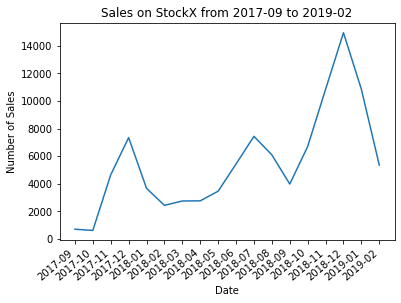

In [ ]:
# plt plot 더 꾸미는 법? 

plt.title('Sales on StockX from 2017-09 to 2019-02')
plt.ylabel('Number of Sales')
plt.xlabel('Date')

plt.plot(transaction)
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

Text(0.5, 1.0, 'test')

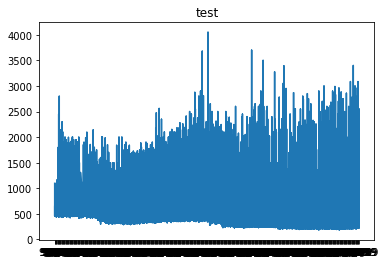

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Order Date'], df['Sale Price'])
plt.title('test')

In [ ]:
df1.groupby("Black").count()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,White,Grey,Red,Neon,Orange,Tan/Brown,Pink,Blue,Premium,Premium %,Days_Since_Release,Order_Date
Black,,,,,,,,,,,,,,,,,,,,
0.0,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071,50071
1.0,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885,49885


In [ ]:
df1.groupby("White").count()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Black,Grey,Red,Neon,Orange,Tan/Brown,Pink,Blue,Premium,Premium %,Days_Since_Release,Order_Date
White,,,,,,,,,,,,,,,,,,,,
0.0,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151,57151
1.0,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805,42805


In [ ]:
df1.groupby("Order Date")["Sale Price"].count() #일별 신발 거래량 

Order Date
2017-09-01     23
2017-09-02     15
2017-09-03     16
2017-09-04     17
2017-09-05     22
             ... 
2019-02-09    346
2019-02-10    303
2019-02-11    445
2019-02-12    404
2019-02-13    348
Name: Sale Price, Length: 531, dtype: int64

In [ ]:
df4

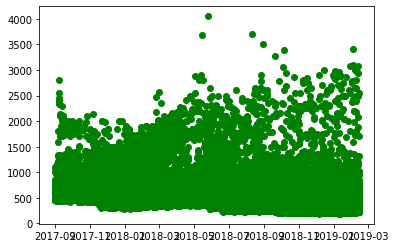

In [ ]:
plt.scatter(df['Order Date'],df['Sale Price'],c='green')
plt.show()

In [ ]:
df5.dtypes

# Linear Regression 

In [ ]:
dff['Order Date'] = pd.to_datetime(dff['Order Date'])
dff['Release Date'] = pd.to_datetime(dff['Release Date'])

In [ ]:
condition = ((dff['Order Date'] > '2018-11-30') & (dff['Order Date'] < '2019-01-01')) # 가장 거래량이 많았던 12월달 선정 
# condition2 = ((df1['Order Date'] > '2019-02-7') & (df1['Order Date'] < '2019-03-01'))

In [ ]:
# condition = ((df1['Order Date'] > '2018-11-30') & (df1['Order Date'] < '2019-01-01')) # 가장 거래량이 많았던 12월달 선정 
# condition2 = ((df1['Order Date'] > '2019-02-7') & (df1['Order Date'] < '2019-03-01'))

In [ ]:
dff = dff[condition]
# test = df1[condition2]

In [ ]:
# df3 = df1[condition]

In [ ]:
dff

,Order Date,Sale Price,Retail Price,Release Date,yeezy350,airjordan,airforce,airmax90,airmax97,presto,vapormax,blazer,zoom,react,California,New York,Oregon,Florida,Texas,Other States,size_freq,Black,White,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales
68813,2018-12-01,715.0,$220,2016-09-24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.047511,0,0,1,0,0,0,1,0,0,0,0,1857
68814,2018-12-01,849.0,$220,2016-09-24,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.035466,0,0,1,0,0,0,1,0,0,0,0,1857
68815,2018-12-01,410.0,$220,2017-11-25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.106677,1,0,1,0,0,0,0,0,0,0,1,6520
68816,2018-12-01,412.0,$220,2017-11-25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.079285,1,0,1,0,0,0,0,0,0,0,1,6520
68817,2018-12-01,400.0,$220,2017-11-25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.106677,1,0,1,0,0,0,0,0,0,0,1,6520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83758,2018-12-31,535.0,$220,2018-12-26,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.183991,0,1,0,0,0,0,0,0,0,0,0,6085
83759,2018-12-31,495.0,$220,2018-12-26,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.106677,0,1,0,0,0,0,0,0,0,0,0,6085
83760,2018-12-31,575.0,$220,2018-12-26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.198857,0,1,0,0,0,0,0,0,0,0,0,6085
83761,2018-12-31,550.0,$220,2018-12-26,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.183991,0,1,0,0,0,0,0,0,0,0,0,6085


In [ ]:
dff["Retail Price"] = dff["Retail Price"].str.replace('$','')
dff["Retail Price"] = dff["Retail Price"].str.replace(',','')
dff["Retail Price"]= dff["Retail Price"].astype(int)
dff["Sale Price"]= dff["Sale Price"].astype(int)

In [ ]:
df2= dff

In [ ]:
df = df2

In [ ]:
# $ Premium Percentage # Retail Price 대비 Sale 가격이 몇 % 나 상승했나? 
df["Premium %"] = (df["Sale Price"] / df["Retail Price"]) * 100 

# 발매 후 며칠이 지났는지 확인하는 피쳐를 만들라 
# Days Since Release
df['Days_Since_Release'] = df['Order Date'] - df['Release Date']
df['Days_Since_Release'] = df['Days_Since_Release'].dt.days.astype('int16')

In [ ]:
df = df.drop(['Order Date','Release Date', 'Premium %'], axis=1)

In [ ]:
df1 = df 

In [ ]:
df1['Days_Since_Release'].mean()

243.59030100334448

In [ ]:
predict = df1['Sale Price'].mean()
errors = predict - df1['Sale Price']
mae_ = errors.abs().mean()

In [ ]:
mae_

100.2911624344306

In [ ]:
def evaluation_metrics(df, feature, target, slope, intercept):
    """
    2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
    df : Pandas 데이터프레임
    feature : 특징 열
    target : 타겟 열
    slope : 선형방정식의 기울기
    intercept : 선형방정식의 y 절편
    """
    
    x = df[feature]
    y = df[target]
    
    # plot 데이터
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # 예측
    y_pred = slope * x + intercept
    
    # plot 예측
    ax.plot(x, y_pred)
    
    # Plot 제곱오차(MSE)
    x_left, x_right = ax.get_xlim() # x-axis view limits
    y_bottom, y_top = ax.get_ylim()
    scale = (x_right - x_left) / (y_top - y_bottom)

    for f, t, p in zip(x, y, y_pred):
        xy = (f, min(t, p))
        h = abs(t - p)
        w_scaled = h * scale
        ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
    # 회귀방정식 평가지표
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)

    display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

In [ ]:
baseline = df1['Sale Price'].mean()
error = baseline - df1['Sale Price']
print('mean_absolute_error: ', error.abs().mean())

mean_absolute_error:  100.2911624344306


In [ ]:
y_pred = [baseline] *len(y)
from sklearn.metrics import  mean_absolute_error, r2_score
r2 = r2_score(y, y_pred)
print('R2 test:', r2)


NameError: ignored

In [ ]:
def evaluate(title, y, y_):
    mae = mean_absolute_error(y, y_)
    rmse = mean_squared_error(y, y_)**0.5
    r2 = r2_score(y, y_)
    print('*{} Result*'.format(title))
    print('='*50)
    print('MAE Score: $', mae)
    print('RMSE Score: $', rmse)
    print('R2 Score: ', r2)
    print()

In [ ]:
pipe_lin = make_pipeline(
    StandardScaler(),
    LinearRegression(n_jobs=-1)
)

pipe_lin.fit(X_train, Y_train)
y_pred = np.exp(pipe_lin.predict(X_test))
evaluate('Linear Regression', y_test, y_pred)

,Metric,Score
0,MSE,65526.624784
1,MAE,176.839251
2,RMSE,255.981688
3,R2,0.000000


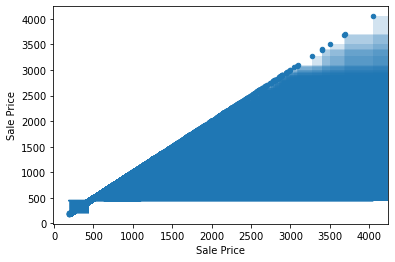

In [ ]:
from matplotlib.patches import Rectangle
evaluation_metrics(df1,'Sale Price', 'Sale Price', 0, df1['Sale Price'].mean())


In [ ]:
df3 = df3.drop(columns='Order_Date')
df3 = df3.drop(columns='Weeks_Since_Release')

In [ ]:
df3 = df3.drop(columns='Order Date')
df3 = df3.drop(columns='Release Date')
df3 = df3.drop(columns='Premium')

In [ ]:
import pandas as pd

# 무작위로 훈련/테스트 데이터셋으로 나누기 
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df1, train_size = 0.80,
                               shuffle=True, random_state=121)

#train = df1.sample(frac=0.75,random_state=1)
#test = df1.drop(train.index)

In [ ]:
# import pandas as pd

# # 무작위로 훈련/테스트 데이터셋으로 나누기 
# from sklearn.model_selection import train_test_split 
# train, test = train_test_split(df, train_size = 0.80,
#                                shuffle=True, random_state=121)

# #train = df1.sample(frac=0.75,random_state=1)
# #test = df1.drop(train.index)

In [ ]:
target = 'Sale Price'
features = df1.drop(columns=[target]).columns
#features2 = ['Sneaker Name', 'Brand', 'Buyer Region', 'Premium %']

#features = ['Sneaker Name', 'Order Date', 'Release Date', 'Brand', 'Premium', 'Black']
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [ ]:
# #encoder = OneHotEncoder(cols = ['Sneaker Name','Brand','Buyer Region'], use_cat_names = True)
# X_train_en = encoder.fit_transform(X_train)
# X_test_en = encoder.transform(X_test)

# #Buyer Region

In [ ]:
X_train

In [ ]:
# 모델 fit 

model = LinearRegression()
model.fit(X_train, Y_train) 

pred = model.predict(X_train)
mae = mean_absolute_error(Y_train, pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 40.58


In [ ]:
mae

40.577416013659864

In [ ]:
pred2 = model.predict(X_test)
mae2 = mean_absolute_error(Y_test, pred2)
mae2

39.29267177741227

In [ ]:
print("mean_squared_error: %.2f" % mean_squared_error(Y_test, pred2))

mean_squared_error: 4695.33


In [ ]:
# 3개의 피쳐들을 썼을 때의 r2 
r2 = r2_score(Y_test, pred2)
r2

0.7650437886399878

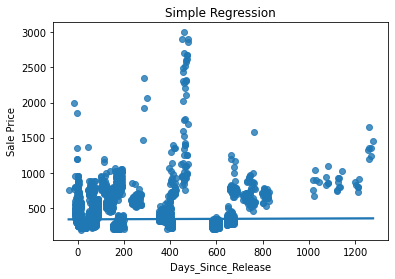

In [ ]:
# Simple Regression 

import seaborn as sns
sns.regplot(x=train['Days_Since_Release'], y=train['Sale Price']).set_title('Simple Regression');

In [ ]:
# Simple Regression 

sns.regplot(x=train['Premium %'], y=train['Sale Price']).set_title('Simple Regression');

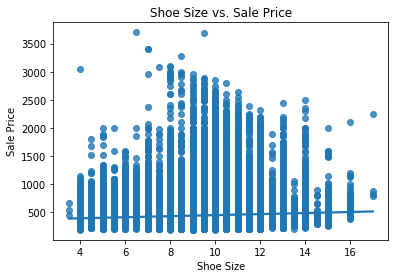

In [ ]:
# Simple Regression 

sns.regplot(x=train['Shoe Size'], y=train['Sale Price']).set_title('Shoe Size vs. Sale Price');

In [ ]:
# Simple Regression 

sns.regplot(x=train['Buyer Region'], y=train['Sale Price']).set_title('Simple Regression');

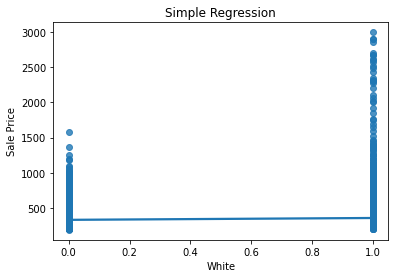

In [ ]:
sns.regplot(x=train['White'], y=train['Sale Price']).set_title('Simple Regression');

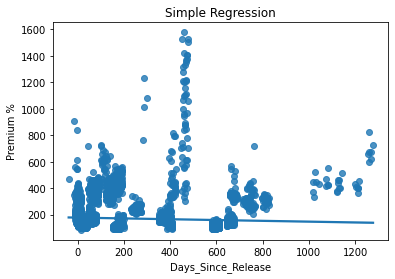

In [ ]:
sns.regplot(x=train['Days_Since_Release'], y=train['Premium %']).set_title('Simple Regression');

In [ ]:
df3

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Premium %,Days_Since_Release
68813,2018-12-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,715,220,2016-09-24,13.0,Maryland,325.000000,798
68814,2018-12-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,849,220,2016-09-24,4.5,Florida,385.909091,798
68815,2018-12-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,410,220,2017-11-25,8.0,Texas,186.363636,371
68816,2018-12-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,412,220,2017-11-25,12.0,Georgia,187.272727,371
68817,2018-12-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,400,220,2017-11-25,8.5,Florida,181.818182,371
...,...,...,...,...,...,...,...,...,...,...
83758,2018-12-31,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,535,220,2018-12-26,9.5,California,243.181818,5
83759,2018-12-31,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,495,220,2018-12-26,8.5,California,225.000000,5
83760,2018-12-31,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,575,220,2018-12-26,10.5,Texas,261.363636,5
83761,2018-12-31,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,550,220,2018-12-26,9.5,Florida,250.000000,5


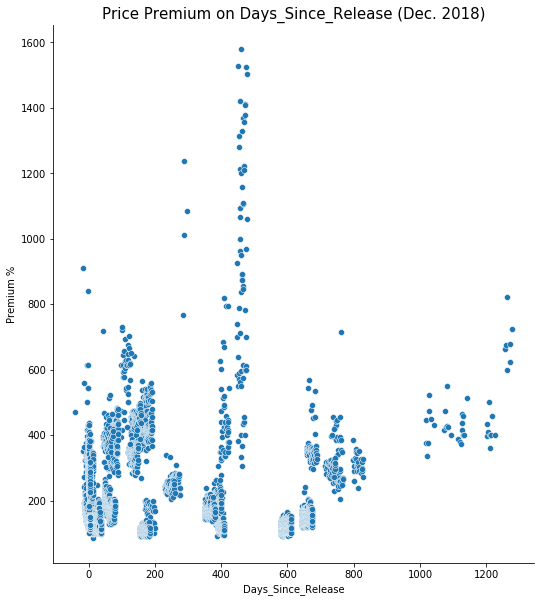

In [ ]:
g = sns.pairplot(df3, x_vars=['Days_Since_Release'], y_vars=['Premium %'])
plt.title('Price Premium on Days_Since_Release (Dec. 2018)', fontsize=15)
g.fig.set_size_inches(10,10)
plt.show()


In [ ]:
df4 = df3 

In [ ]:
df4['Weeks_Since_Release'] = df3['Days_Since_Release'] / 7 

In [ ]:
df4

In [ ]:
df

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [ ]:
# $ Premium Percentage # Retail Price 대비 Sale 가격이 몇 % 나 상승했나? 
df["Premium %"] = (df["Sale Price"] / df["Retail Price"]) * 100 

# 발매 후 며칠이 지났는지 확인하는 피쳐를 만들라 
# Days Since Release
df['Days_Since_Release'] = df['Order Date'] - df['Release Date']
df['Days_Since_Release'] = df['Days_Since_Release'].dt.days.astype('int16')

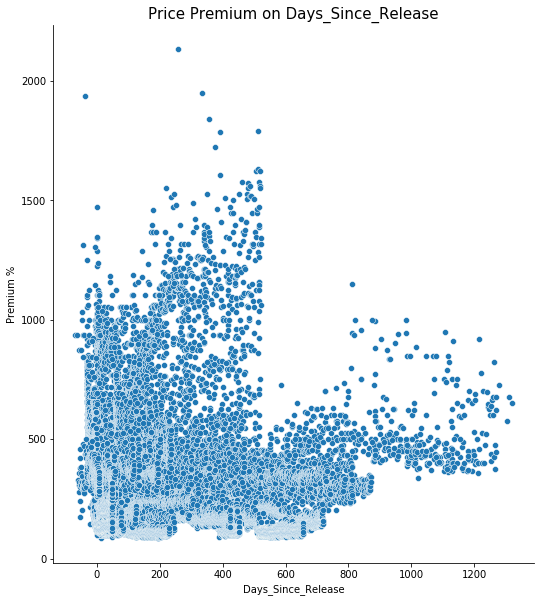

In [ ]:
g = sns.pairplot(df, x_vars=['Days_Since_Release'], y_vars=['Premium %'])
plt.title('Price Premium on Days_Since_Release', fontsize=15)
g.fig.set_size_inches(10,10)
plt.show()


In [ ]:
condition3 = (df['Brand'] == 'Yeezy')

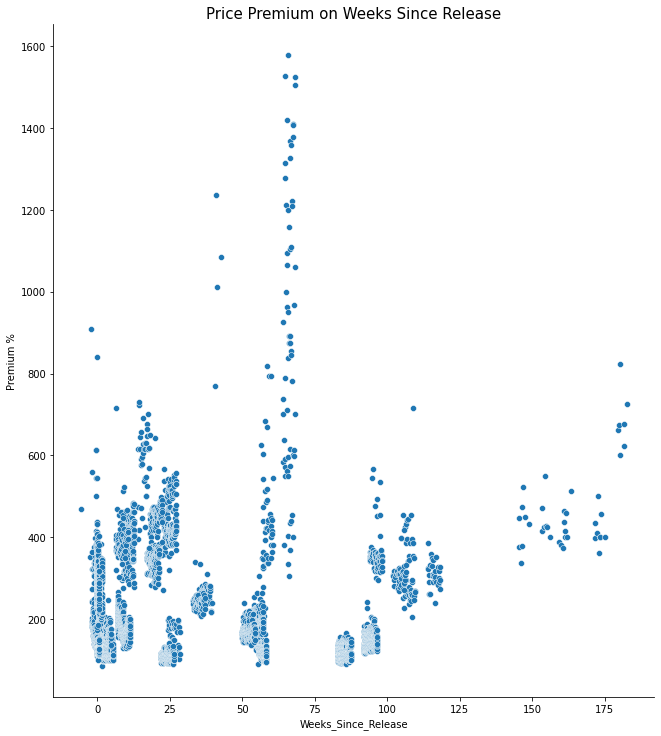

In [ ]:
h = sns.pairplot(df3, x_vars=['Weeks_Since_Release'], y_vars=['Premium %'])
plt.title('Price Premium on Weeks Since Release', fontsize=15)
h.fig.set_size_inches(12.5,12.5)
plt.show()


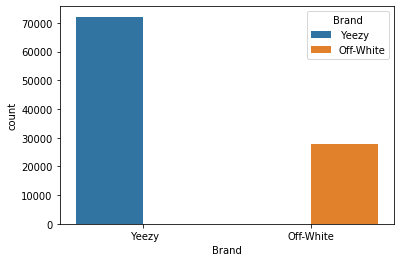

In [ ]:
sns.countplot(x="Brand", hue="Brand", data=df)
plt.show()

In [ ]:
x = df['Sale Price']

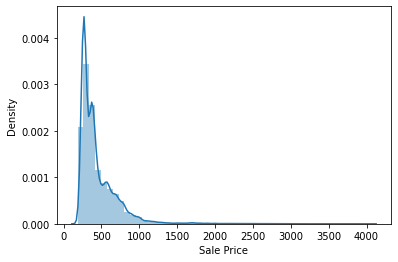

In [ ]:
sns.distplot(x)

# Random Forest

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipe2 = make_pipeline(
    #OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

In [ ]:
df1

In [ ]:
target = 'Sale Price'
features = df1.drop(columns=[target]).columns
#features2 = ['Days_Since_Release','Shoe Size']
#features = df1.columns
#features = ['Sneaker Name', 'Order Date', 'Release Date', 'Brand', 'Premium', 'Black']
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [ ]:
from sklearn.metrics import classification_report
# train 학습, 테스트 셋 정확도
pipe2.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [ ]:
print('테스트 정확도', pipe2.score(X_test, Y_test))

#print(classification_report(Y_test, pipe.predict(X_test)))

테스트 정확도 0.08361204013377926


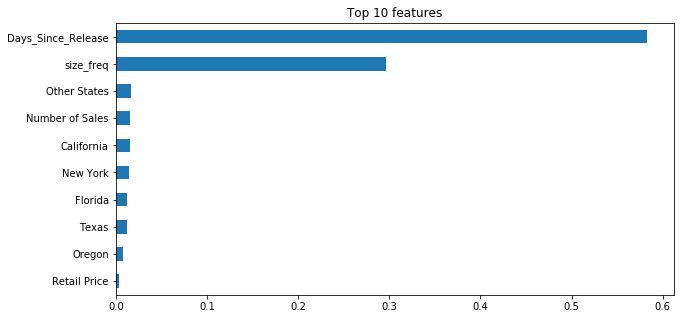

In [ ]:
# 특성 중요도 / Permutation Importances 

rf = pipe2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# XGBoosting 

In [ ]:
# XGBoosting 
from category_encoders import OrdinalEncoder 
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=10
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, Y_train);

In [ ]:
X_test

In [ ]:
from sklearn.metrics import accuracy_score
#y_pred = pipe.predict(X_val)
y_pred = pipe.predict(X_test)

#print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('테스트 정확도: ', accuracy_score(Y_test, y_pred))

#print(classification_report(y_pred, y_val))

테스트 정확도:  0.10367892976588629


In [ ]:
y_pred

array([349, 372, 240, ..., 275, 266, 279])

In [ ]:
from sklearn.metrics import accuracy_score
#y_pred = pipe.predict(X_val)
y_pred = pipe.predict(X_test)

#print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('테스트 정확도: ', accuracy_score(Y_test, y_pred))

#print(classification_report(y_pred, y_val))

검증 정확도:  0.7734005672864797


In [ ]:
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 75

In [ ]:
pip install PDPbox

In [ ]:
model

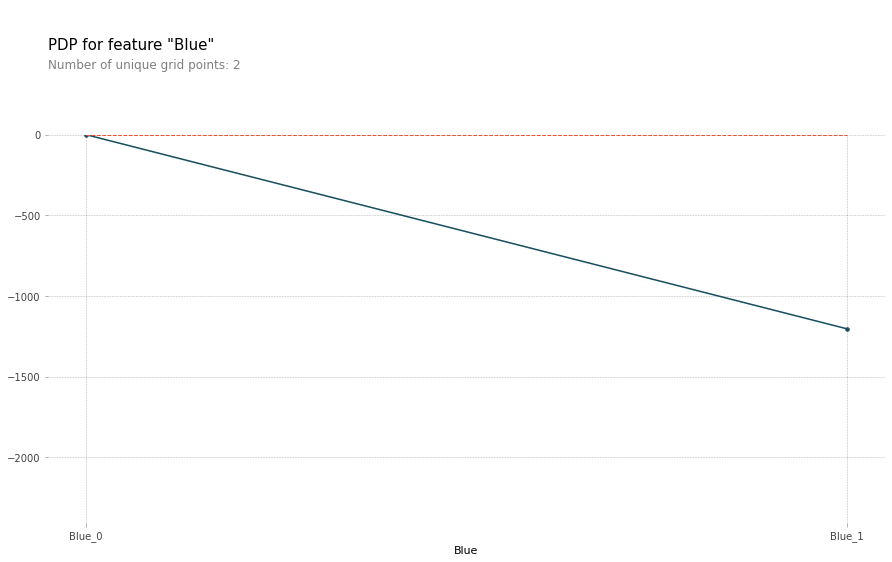

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Blue'

isolated = pdp_isolate(
    model = final_model,
    dataset = X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

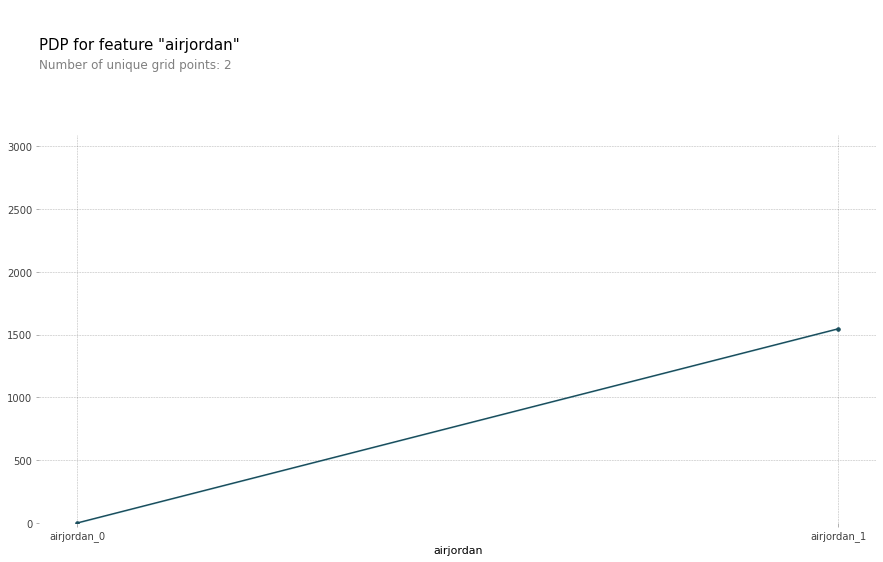

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'airjordan'

isolated = pdp_isolate(
    model = final_model,
    dataset = X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


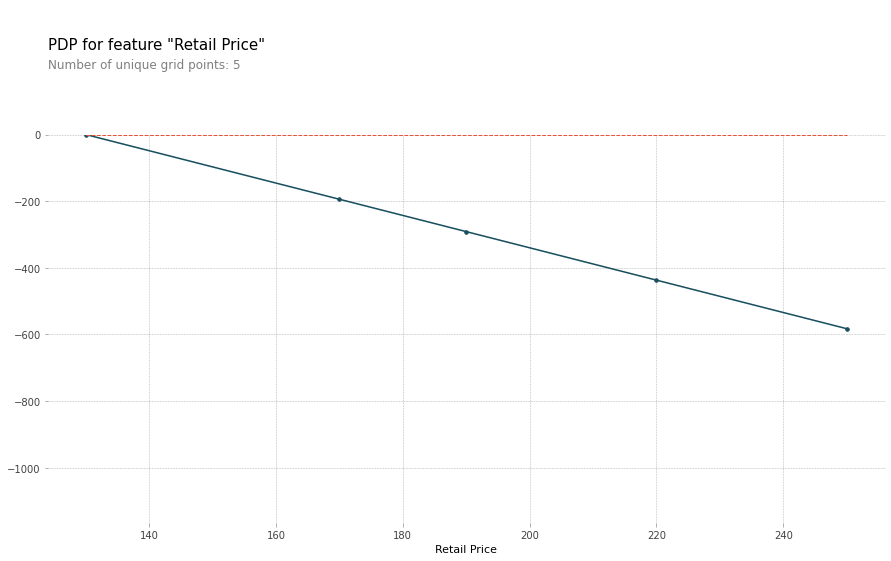

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Retail Price'

isolated = pdp_isolate(
    model = final_model,
    dataset = X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
X_test

In [ ]:
feature = 'Days_Since_Release'
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
feature = 'Shoe Size'
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
pip install shap

In [ ]:
row

,Retail Price,yeezy350,airjordan,airforce,airmax90,airmax97,presto,vapormax,blazer,zoom,react,California,New York,Oregon,Florida,Texas,Other States,size_freq,Black,White,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Premium %,Days_Since_Release
78186,170,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.183991,1,0,0,0,0,1,0,0,0,0,0,218.823529,2


In [ ]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

model = xgboost.XGBRegressor().fit(X_train, Y_train)

explainer = shap.TreeExplainer(model)
row = X_test.iloc[[1]]
shap_values = explainer.shap_values(row)

### Draw SHAP plots ###
# 1) force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다 -> FALSE 

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

[08:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


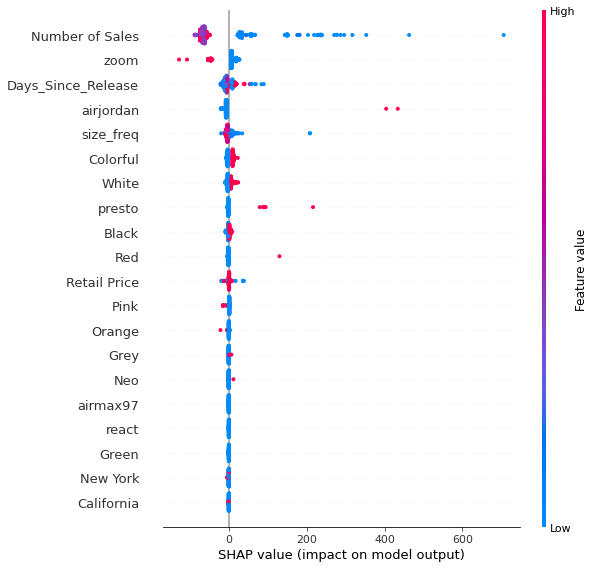

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300])

# Lasso Regreesion 

In [ ]:
import random 
random.seed(1)
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# fit LASSO with 5-fold cross validation
lasso = Lasso()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]}
r2 = make_scorer(r2_score, greater_is_better=True)
clf = GridSearchCV(lasso, 
                   parameters, 
                   cv=5,
                   scoring=r2)
clf.fit(X_train, Y_train)

In [ ]:
# cross validation score
lasso_best_params = clf.best_params_
lasso_best_estimator = clf.best_estimator_
lasso_score = clf.best_score_
print("Score: "+ str(lasso_score))

Score: 0.8147991775927792


In [ ]:
# retrain lasso model
lasso = Lasso(alpha=lasso_best_params['alpha'])
final_model = lasso.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+07, tolerance: 3.659e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# test set performance

Y_pred = final_model.predict(X_test)
print('R²: %.2f' % r2_score(Y_test, Y_pred))
print("mean_squared_error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(Y_test,Y_pred))

R²: 0.77
mean_squared_error: 4694.69
mean_absolute_error:39.30


In [ ]:
var = X_train.columns
coef = final_model.coef_
for i,name in enumerate(var):
    print(name, coef[i])

Retail Price -4.854905891429523
yeezy350 102.23378952452796
airjordan 1546.6878666333605
airforce -39.67709221792355
airmax90 977.8323574284199
airmax97 320.7600109475572
presto 21.42212885542455
vapormax 433.63928180205505
blazer -200.91578424104856
zoom -211.22425749815517
react 174.94687113186816
California 0.3574708771246823
New York -1.5703447023734538
Oregon 3.7248415875932066
Florida -3.769475766494837
Texas 2.025130791541035
Other States -0.0
size_freq -102.76203217932245
Black 44.43567602169376
White 109.70716477174115
Grey 55.69607236752217
Red 317.53528537792306
Green 5.662611025845729
Neo -56.797218019834276
Orange 77.07109610402689
Tan/Brown 394.01666328538545
Pink 17.346813262968464
Blue -1203.004383165756
Colorful 5.223566950910005
Number of Sales -0.009673489740566775
Days_Since_Release 0.21374298151006071


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X_train.columns, y=final_model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Lasso coefficient'),
    title='Weight of each feature for predicting Sale Price'
)
fig.show()

In [ ]:
# 특성 중요도 / Permutation Importances 

rf = pipe2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
X_test2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StockX_Test.csv")
X_test2

In [ ]:
X_test2 = X_test2.dropna()

In [ ]:
X_test2["Retail Price"] = X_test2["Retail Price"].str.replace('$','')
X_test2["Retail Price"]= X_test2["Retail Price"].astype(int)

In [ ]:
X_test2['Order Date'] = pd.to_datetime(X_test2['Order Date']) # to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환
X_test2['Release Date'] = pd.to_datetime(X_test2['Release Date'])

In [ ]:
X_test2['Days_Since_Release'] = X_test2['Order Date'] - X_test2['Release Date']
X_test2['Days_Since_Release'] = X_test2['Days_Since_Release'].dt.days.astype('int16')

In [ ]:
X_test2 = X_test2.drop(['Order Date','Release Date'], axis=1)

In [ ]:
Y_pred2 = final_model.predict(X_test2)
Y_pred2 

array([ 367.33272417, 2645.65059022])